In [0]:
!wget https://www.dropbox.com/s/5nr4q08af06gmfv/ShipClassification.zip?dl=0

In [1]:
!ls

 sample_data   ShipClassification  'ShipClassification.zip?dl=0'


In [0]:
from zipfile import ZipFile
file_name="ShipClassification.zip?dl=0"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

In [0]:
!ls

In [0]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *
import fastai.vision as fa
from fastai.metrics import error_rate

In [0]:
path = Path('/content/ShipClassification/')

In [0]:
!pip install patool

In [0]:
import patoolib
patoolib.extract_archive("/content/ShipClassification/train.zip",outdir=path)

In [0]:
path.ls()

In [0]:
import os  
os.rename('/content/ShipClassification/train.csv','/content/ShipClassification/labels.csv') 

In [0]:
labels = pd.read_csv('/content/ShipClassification/labels.csv') 
test = pd.read_csv('/content/ShipClassification/test_ApKoW4T.csv')
submit = pd.read_csv('/content/ShipClassification/sample_submission_ns2btKE.csv')


In [0]:

labels.shape, test.shape


In [0]:
labels.dtypes

In [8]:
os.makedirs("/content/ShipClassification/test")

FileExistsError: ignored

In [0]:
torch.cuda.is_available()

In [0]:
import os
import shutil
src = '/content/ShipClassification/images/'
dst = '/content/ShipClassification/test/'
for i in range(test.shape[0]):
 srcpath = os.path.join(src, test['image'][i])
 dstpath = os.path.join(dst, test['image'][i])
 shutil.copyfile(srcpath, dstpath)

In [0]:
def get_ex(): return open_image(path/'images/626289.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

In [0]:
tfm = symmetric_warp(magnitude=(-0.2,0.2))
_, axs = plt.subplots(2,4,figsize=(12,6))
for ax in axs.flatten():
    img = get_ex().apply_tfms(tfm, padding_mode='zeros')
    img.show(ax=ax)

In [0]:
np.random.seed(42)
bs=16


tfms = get_transforms()

data = ImageDataBunch.from_csv(path,folder='images',csv_labels='labels.csv',label_delim=',',valid_pct=0.2, ds_tfms=tfms,test='test',size=224,bs=bs)


                      
stats=data.batch_stats()  
                      
data.normalize(stats)


In [0]:
bs=16
def get_data(sz):
  
 tfms = get_transforms()
 data=ImageDataBunch.from_csv(path,folder='images',csv_labels='labels.csv',label_delim=',',valid_pct=0.2, ds_tfms=tfms,test='test',bs=bs,size=sz)
 
 return data


In [0]:

data_64 = get_data(64)

In [0]:
data_64.classes

In [0]:
data_64.show_batch(rows=2, figsize=(15,10))

In [0]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn =cnn_learner(data_64, models.densenet169,metrics=[acc_02,f_score])

In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.360540,0.306053,0.809440,0.737395,00:50
1,0.290047,0.251473,0.836320,0.793529,00:50
2,0.249512,0.220592,0.869760,0.823072,00:50
3,0.230067,0.211818,0.875680,0.837371,00:50


In [26]:
learn.save('stage-1_64')
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


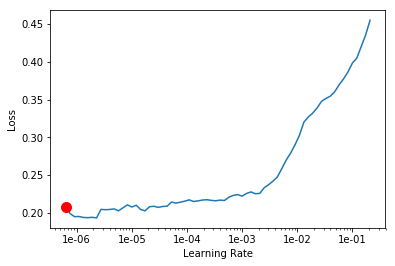

In [27]:

learn.recorder.plot(suggestion=True)

In [29]:
learn.fit_one_cycle(4, slice(1E-05,1E-04))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.215220,0.192825,0.890720,0.856705,00:58
1,0.207104,0.179888,0.896320,0.857867,00:58
2,0.189285,0.173422,0.897600,0.864114,00:58
3,0.173784,0.171778,0.906080,0.866000,00:58


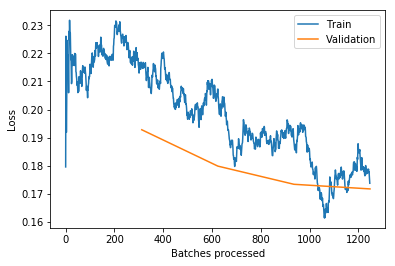

In [30]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-2_64')


In [0]:
learn.data=get_data(128)

In [0]:
data.show_batch(rows=2, figsize=(15,10))

In [0]:
learn.load('stage-2_64')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


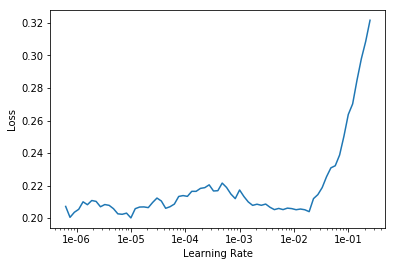

In [35]:
learn.lr_find()
learn.recorder.plot()


In [36]:
learn.fit_one_cycle(4, slice(1E-03,1E-02))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.195144,0.125246,0.934080,0.900190,00:53
1,0.175711,0.111443,0.947040,0.914914,00:53
2,0.114557,0.088470,0.960000,0.939066,00:52
3,0.101095,0.079618,0.963040,0.943009,00:52


In [0]:

learn.save('stage-1-128p')

In [38]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


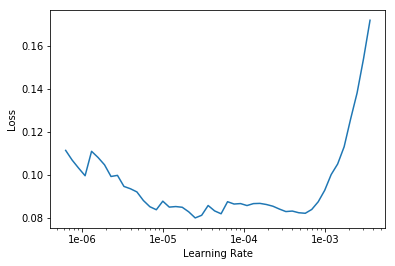

In [39]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(4,slice(1E-04,1E-03))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.158188,0.163579,0.933760,0.886476,01:02
1,0.131296,0.091765,0.954720,0.933086,01:03
2,0.096574,0.065890,0.967520,0.956324,01:03
3,0.072919,0.059440,0.972320,0.960743,01:02


In [0]:

learn.save('stage-2-128p')
learn.data=get_data(196)

learn.load('stage-2-128p')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07


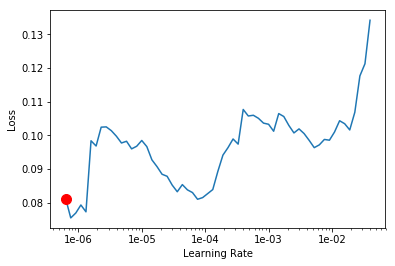

In [45]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [46]:

lr=1e-4/2
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.098310,0.041406,0.979840,0.974381,01:08
1,0.082714,0.040649,0.980480,0.974381,01:08
2,0.088060,0.039546,0.980960,0.975333,01:08
3,0.103356,0.038385,0.982240,0.975467,01:07
4,0.090156,0.039199,0.980960,0.976343,01:06


In [0]:
learn.save('stage-1-196p')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.58E-06


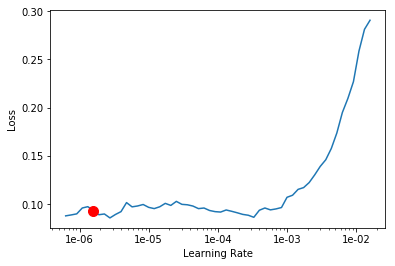

In [48]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)


In [49]:
learn.fit_one_cycle(5, slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.097968,0.058694,0.973120,0.962914,01:19
1,0.109168,0.130182,0.972480,0.962686,01:19
2,0.075205,0.050485,0.973760,0.965981,01:19
3,0.048764,0.034791,0.982720,0.974838,01:18
4,0.039487,0.031794,0.985280,0.980971,01:18


In [0]:
learn.save('stage-2-196p')

In [0]:
learn.data=get_data(224)

learn.load('stage-2-196p')
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.59E-07


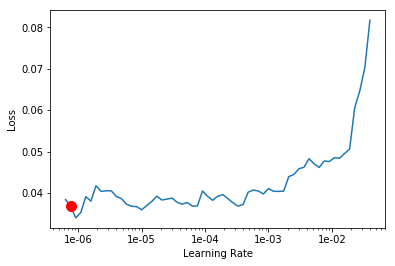

In [52]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [53]:
learn.fit_one_cycle(5,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.044434,0.013644,0.993760,0.993200,01:18
1,0.043787,0.012357,0.993600,0.992534,01:16
2,0.035016,0.011405,0.994240,0.993067,01:16
3,0.030614,0.010120,0.994400,0.994305,01:15
4,0.036274,0.010150,0.994080,0.993200,01:15


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06


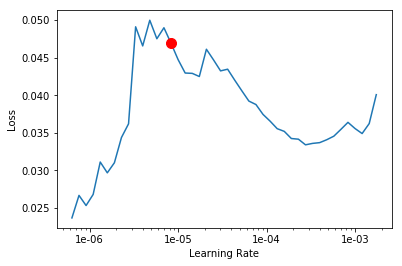

In [54]:
learn.save('stage-1-224p')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [65]:
learn.fit_one_cycle(8,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.022431,0.027516,0.988000,0.980133,01:32
1,0.054557,0.066087,0.970560,0.951905,01:31
2,0.060212,0.044069,0.980000,0.969467,01:31
3,0.045006,0.034046,0.985280,0.975600,01:31
4,0.034578,0.028251,0.987040,0.979067,01:31
5,0.023185,0.025624,0.988480,0.982667,01:31
6,0.018585,0.025384,0.990080,0.983867,01:31
7,0.011330,0.022785,0.990560,0.984933,01:31


In [0]:
learn.save('stage-2-224p')

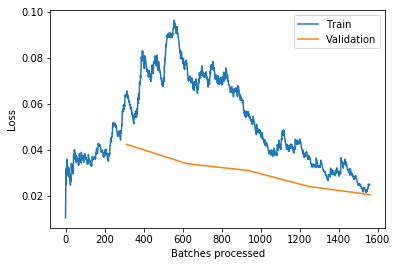

In [57]:
learn.recorder.plot_losses()

In [67]:
learn.load('stage-2-224p')

Learner(data=ImageDataBunch;

Train: LabelList (5002 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
1,2,3,4,1
Path: /content/ShipClassification;

Valid: LabelList (1250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: MultiCategoryList
3,3,3,1,4
Path: /content/ShipClassification;

Test: LabelList (2680 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: /content/ShipClassification, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, cei

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
preds,_ = learn.get_preds(ds_type=DatasetType.Test)
labels = np.argmax(preds, 1)

test_predictions_direct = [data.classes[int(x)] for x in labels]

In [0]:
test_predictions_direct

In [0]:
fnames = [f.name for f in learn.data.test_ds.items]

In [0]:
df = pd.DataFrame({'image':fnames, 'category':test_predictions_direct}, columns=['image', 'category'])

In [0]:
df.head()

In [0]:
df.to_csv("data_fastai_30.csv",index=False)
from google.colab import files
files.download('data_fastai_30.csv')